# Importing Libraries and Files

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
%matplotlib inline

In [2]:
# Turning the warnings off
warnings.filterwarnings(action= 'ignore')

In [1]:
# Path variable of 'telecom_churn_data.csv'
# Kindly enter the path variable
Path_var= 

In [3]:
#Creating the initial dataframe
data= pd.read_csv(Path_var)

# Data Cleaning and EDA

In [4]:
# Observing the dataframe
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Shape of the dataframe
data.shape

(99999, 226)

In [6]:
# Columns with over 70000 null values i.e. over 70% of the values are null can be dropped
data.drop(data[data.columns[(data.isnull().sum() > 70000).values]], inplace= True, axis= 1)

In [7]:
# Keywords which associate with Price, taken from the Data dictionary
price_kw= ['arpu', 'amt', 'rech']

In [8]:
# Creating a list 'price_attr' with all the columns which have these keywords
price_attr= []
for i in data.columns:
    for j in price_kw:
        x= re.findall(j, i)
        y= re.search("_9$", i)
        z= re.search("_8$", i)
        if (len(x) != 0) & (y == None) & (z==None):
            price_attr.append(i)
            break


In [9]:
# Creating a dataframe with only these columns
revenue= data[price_attr]

In [10]:
# Visualizing the dataframe
revenue.head()

,arpu_6,arpu_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7
0,197.385,214.816,4,3,362,252,252,252,6/21/2014,7/16/2014,252,252
1,34.047,355.074,4,9,74,384,44,154,6/29/2014,7/31/2014,44,23
2,167.690,189.058,5,4,168,315,86,200,6/17/2014,7/24/2014,0,200
3,221.338,251.102,10,11,230,310,60,50,6/28/2014,7/31/2014,30,50
4,261.636,309.876,5,6,196,350,56,110,6/26/2014,7/28/2014,50,110


In [11]:
# Checking for irrelevent columns
price_attr

['arpu_6',
 'arpu_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7']

In [12]:
# Dropping features which are not relevent to our analysis
revenue.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'last_day_rch_amt_6','last_day_rch_amt_7'], inplace= True, axis= 1)

In [13]:
# Concatenating 'mobile_number' feature, incase any patterns emerge
revenue= pd.concat([revenue, data.mobile_number], axis= 1)

In [14]:
# Checking for null values
revenue.isnull().sum()

arpu_6              0
arpu_7              0
total_rech_num_6    0
total_rech_num_7    0
total_rech_amt_6    0
total_rech_amt_7    0
max_rech_amt_6      0
max_rech_amt_7      0
mobile_number       0
dtype: int64

In [15]:
# viewing the percentiles of the features
revenue.describe(percentiles=[0.50,0.70,0.75,0.85,0.95,0.99])

,arpu_6,arpu_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,mobile_number
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04
mean,282.987358,278.536648,7.558806,7.700367,327.514615,322.962970,104.637486,104.752398,7.001207e+09
std,328.439770,338.156291,7.078405,7.070422,398.019701,408.114237,120.614894,124.523970,6.956694e+05
min,-2258.709000,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09
50%,197.704000,191.640000,6.000000,6.000000,230.000000,220.000000,110.000000,110.000000,7.001205e+09
70%,324.839400,317.910400,8.000000,8.000000,378.000000,370.000000,110.000000,120.000000,7.001690e+09
75%,371.060000,365.344500,9.000000,10.000000,437.500000,428.000000,120.000000,128.000000,7.001812e+09
85%,507.231500,501.389100,12.000000,13.000000,594.000000,590.000000,154.000000,154.000000,7.002050e+09
95%,829.488200,828.357200,20.000000,21.000000,994.000000,993.000000,252.000000,252.000000,7.002291e+09
99%,1410.792540,1428.685880,35.000000,35.000000,1683.020000,1728.000000,550.000000,550.000000,7.002387e+09


In [16]:
# average of the 70th percentile for 'tot_rech_amt' of the first 2 months, i.e. 6th and 7th month
avg_totrech= ((378 + 370)/2)

In [17]:
# Dropping values which have a lesser amount than the average amount for 'tot_rech_amt'
revenue.drop(revenue[((revenue.total_rech_amt_6 + revenue.total_rech_amt_7 )/2) < avg_totrech].index, inplace= True)

In [18]:
# Visualizing the Dataframe
revenue

,arpu_6,arpu_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,mobile_number
7,1069.180,1349.850,5,5,1580,790,1580,790,7000701601
8,378.721,492.223,19,21,437,601,90,154,7001524846
13,492.846,205.671,6,4,507,253,110,110,7002191713
16,430.975,299.869,10,6,570,348,110,110,7000875565
17,690.008,18.980,19,2,816,0,110,0,7000187447
...,...,...,...,...,...,...,...,...,...
99965,292.930,641.110,17,38,336,736,36,50,7000519799
99970,261.269,410.614,11,19,337,447,90,67,7001386760
99974,414.303,321.093,8,7,520,410,120,120,7001453306
99986,644.973,455.228,6,8,567,1130,550,786,7001729035


In [19]:
# creating final dataframe with only these datapoints, i.e. the datapoints in which average 'tot_rech_amt' is greater than that
# of the averages of the 6th and 7th month
df_final= data.loc[revenue.index]

In [20]:
# Resetting the index of the final dataframe
df_final.reset_index(inplace= True)

In [21]:
# Dropping the 'index' column from the df_final dataframe
df_final.drop('index', inplace= True, axis= 1)

In [22]:
# Visualizing the dataframe
df_final.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
4,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0


In [23]:
# Selecting the variable important in determining churn
churn_ind= ['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9' ]

In [24]:
# Creating a dataframe to determine the churn variable
df_churn= df_final[churn_ind]

In [25]:
# Determining the index values of the rows for which churn has occured
churn_index= df_churn[(df_churn.total_ic_mou_9 == 0) & (df_churn.total_og_mou_9== 0) & (df_churn.vol_2g_mb_9 ==0) & (df_churn.vol_3g_mb_9==0)].index

In [26]:
# Creating a churn variable
churn= []
for i in df_churn.index:
    if i in churn_index:
        churn.append(1)
    else:
        churn.append(0)

In [27]:
# adding the churn variable to the df_churn dataframe
df_churn['churn']= churn

In [28]:
# Calculating churn percentage
# 8.6% of cases result in churn
df_churn.churn.value_counts(normalize= True)

0    0.913677
1    0.086323
Name: churn, dtype: float64

In [29]:
# Determining 9th month variables in columns to drop
to_drop= []
for i in df_final.columns:
    x= re.search("_9$", i)
    if x != None:
        to_drop.append(i)
    

In [30]:
# Dropping the columns
df_final.drop(to_drop, inplace= True, axis= 1)

In [31]:
# Attaching the churn variable to the main dataframe
df_final['churn']= churn

In [32]:
# Visualizing the data
df_final

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
4,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29454,7000519799,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,292.930,641.110,...,0,0,0,0,464,0.00,0.00,0.00,0.0,0
29455,7001386760,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.269,410.614,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
29456,7001453306,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.303,321.093,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
29457,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,644.973,455.228,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0


In [33]:
# Columns with null values
df_final[df_final.columns[df_final.isnull().sum() > 0]].shape[1]

95

In [34]:
# The column last_date_of_month_6 has only one value
df_final.last_date_of_month_6.value_counts()

6/30/2014    29459
Name: last_date_of_month_6, dtype: int64

In [35]:
# The column last_date_of_month_7 has only one value
df_final.last_date_of_month_7.value_counts()

7/31/2014    29428
Name: last_date_of_month_7, dtype: int64

In [36]:
# The column last_date_of_month_8 has only one value
df_final.last_date_of_month_8.value_counts()

8/31/2014    29303
Name: last_date_of_month_8, dtype: int64

In [37]:
# Dropping these columns as they will not contribute to our analysis
df_final.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8'],inplace= True, axis= 1)

In [38]:
# Converting the date_of_last_rech for the 6th, 7th and 8th month to 'datetime' format and extracting the 'day' into the columns
df_final['date_of_last_rech_6']= pd.to_datetime(df_final['date_of_last_rech_6']).apply(lambda x: x.day)
df_final['date_of_last_rech_7']= pd.to_datetime(df_final['date_of_last_rech_7']).apply(lambda x: x.day)
df_final['date_of_last_rech_8']= pd.to_datetime(df_final['date_of_last_rech_8']).apply(lambda x: x.day)


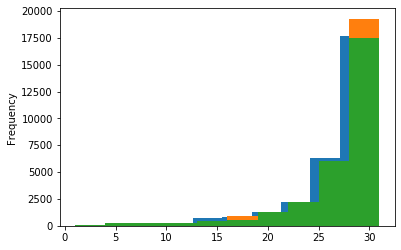

In [39]:
# Creating a histogram to observe any anomalies in frequency in the 3 months
df_final['date_of_last_rech_6'].plot(kind= 'hist')
df_final['date_of_last_rech_7'].plot(kind= 'hist')
df_final['date_of_last_rech_8'].plot(kind= 'hist')

In [40]:
# Since no particular anomalies are present and the data for the three months is almost the same we may drop these columns from
# our analysis
df_final.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], inplace= True, axis= 1)

In [41]:
# null values present in columns
df_final.isnull().sum().sort_values(ascending= False).head(50)

std_og_t2t_mou_8    927
std_ic_t2t_mou_8    927
loc_og_t2c_mou_8    927
loc_og_mou_8        927
ic_others_8         927
isd_ic_mou_8        927
spl_ic_mou_8        927
std_ic_mou_8        927
std_ic_t2o_mou_8    927
std_ic_t2f_mou_8    927
std_ic_t2m_mou_8    927
loc_ic_mou_8        927
loc_og_t2m_mou_8    927
loc_ic_t2f_mou_8    927
loc_ic_t2m_mou_8    927
loc_ic_t2t_mou_8    927
std_og_t2m_mou_8    927
og_others_8         927
spl_og_mou_8        927
isd_og_mou_8        927
std_og_mou_8        927
std_og_t2c_mou_8    927
loc_og_t2f_mou_8    927
std_og_t2f_mou_8    927
roam_og_mou_8       927
loc_og_t2t_mou_8    927
offnet_mou_8        927
roam_ic_mou_8       927
onnet_mou_8         927
onnet_mou_6         311
std_ic_t2o_mou_6    311
std_ic_t2f_mou_6    311
offnet_mou_6        311
std_ic_t2t_mou_6    311
loc_ic_mou_6        311
std_og_t2m_mou_6    311
loc_og_t2m_mou_6    311
std_ic_mou_6        311
loc_ic_t2m_mou_6    311
loc_ic_t2t_mou_6    311
std_og_t2f_mou_6    311
og_others_6     

In [42]:
# Creating a dataframe with only the columns which have null values
col_null= df_final[df_final.columns[df_final.isnull().sum() > 0]].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T

In [43]:
# The columns which have a mean zero are likely to be filled with zero
# also if the min and max value is zero then the column is filled with zero for sure
# Percentiles are added just to be sure
col_null[(col_null['mean']==0).values]

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
loc_og_t2o_mou,29345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,29345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,29345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_6,29148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_7,29158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_8,28532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_6,29148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_7,29158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_8,28532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Dropping these value from the main dataframe
df_final.drop(['loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], inplace= True, axis= 1)

In [45]:
# Dropping these value from the main col_null dataframe
col_null.drop(['loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], inplace= True, axis= 0)

In [46]:
# Dropping columns in which 75% of the values are zero from the main dataframe
# We will be adopting this method of dropping columns instead of rows since this will avoid dropping datapoints(rows) which may
# containg the churn value
# We are doing the since the rows with a positive churn value are very small compared to those which are not positive
df_final.drop(col_null[(col_null['75%'].apply(lambda x: round(x,0)) == 0).values].index, inplace= True, axis=1)

In [47]:
# Dropping columns in which 75% of the values are zero from the col_null dataframe
col_null.drop(col_null[(col_null['75%'].apply(lambda x: round(x,0)) == 0).values].index, inplace= True, axis= 0)

In [48]:
# Visualizing the col_null dataframe
# the rows of this dataframe correspond to the columns of the main dataframe
# the columns of this data frame contain the attributes of these columns necessary for EDA
col_null

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
onnet_mou_6,29148.0,302.316729,465.270642,0.0,43.3300,129.700,362.1175,464.710,603.9280,806.852,1169.9295,2179.2571,7376.71
onnet_mou_7,29158.0,310.551288,486.465149,0.0,43.2600,129.595,370.0275,478.036,621.4025,836.483,1227.3245,2240.9169,8157.78
onnet_mou_8,28532.0,278.802984,474.301629,0.0,32.6400,107.760,314.0000,406.434,544.2205,752.233,1140.2975,2233.8522,10752.56
offnet_mou_6,29148.0,426.192002,474.017148,0.0,143.0550,288.800,533.1325,621.840,743.2600,927.069,1284.9095,2347.4420,8362.36
offnet_mou_7,29158.0,432.171249,490.110921,0.0,141.4825,288.750,543.1300,638.242,766.1190,945.634,1303.1645,2437.7304,9667.13
offnet_mou_8,28532.0,390.792880,483.314560,0.0,109.1400,254.430,498.5775,581.130,700.0545,873.805,1211.4885,2241.9260,14007.34
loc_og_t2t_mou_6,29148.0,96.369164,239.281829,0.0,8.9300,33.560,93.3325,117.210,152.5395,210.545,353.4595,1081.9736,6431.33
loc_og_t2t_mou_7,29158.0,97.498546,251.004104,0.0,9.6825,34.210,93.3050,117.130,153.1735,211.145,351.6250,1074.6524,7400.66
loc_og_t2t_mou_8,28532.0,90.566193,239.133021,0.0,7.2900,31.090,88.6500,111.406,146.2205,202.974,333.1020,979.9740,10752.56
loc_og_t2m_mou_6,29148.0,184.640672,252.360113,0.0,32.0250,104.495,244.2175,290.310,351.7885,441.339,624.1280,1160.4284,4729.74


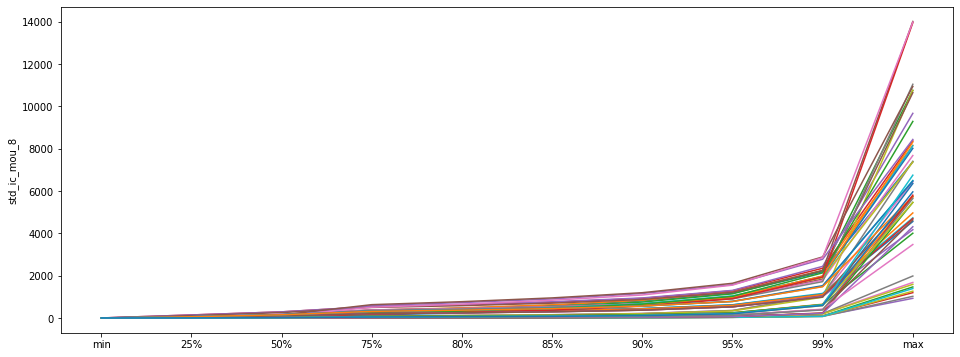

In [49]:
# Visualizing the percentiles on a lineplot, notice the abrupt increase after the 99%
# This is due to outliers
plt.figure(figsize=( 16,6))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in col_null.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= col_null.loc[i,col], x= list(range(0,len(col))))

In [50]:
# Dropping the outliers from the main dataframe
for i in col_null.index:
    df_final.drop(df_final[(df_final[i] > col_null.loc[i, '99%']).values].index, inplace= True, axis= 0)

In [51]:
# Redefining the col_null dataframe
col_null= df_final[col_null.index].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T 

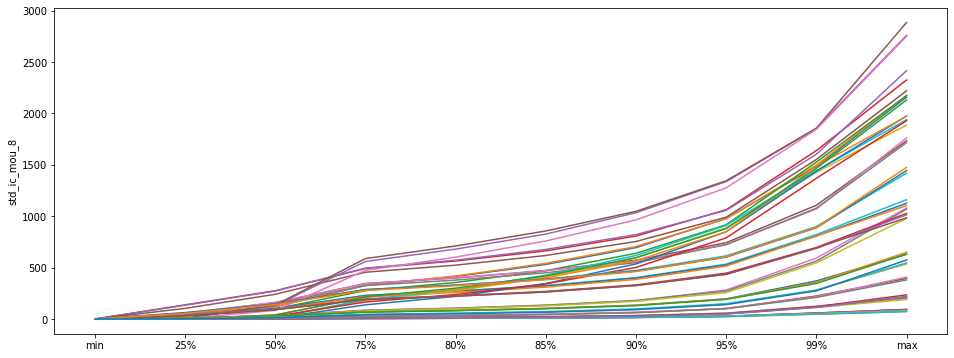

In [52]:
# Visualizing the percentiles once again
plt.figure(figsize=( 16,6))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in col_null.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= col_null.loc[i,col], x= list(range(0,len(col))))

In [53]:
# There are still some outliers present
# Removing the outliers
for i in col_null.index:
    df_final.drop(df_final[(df_final[i] > col_null.loc[i, '99%']).values].index, inplace= True, axis= 0)

In [54]:
# Redefining the col_null dataframe
col_null= df_final[col_null.index].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T 

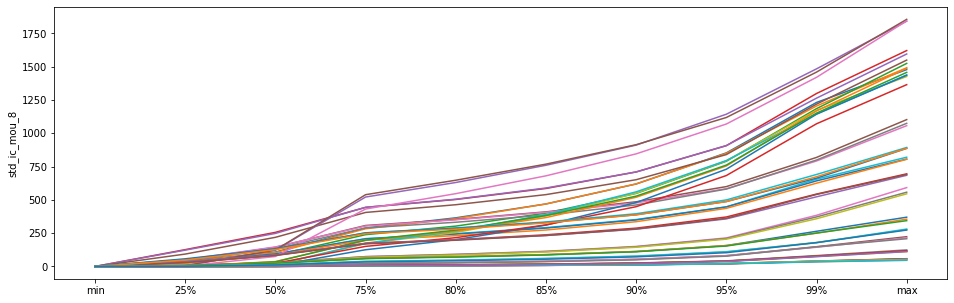

In [55]:
# Visualizing the percentiles once again
plt.figure(figsize=( 16,5))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in col_null.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= col_null.loc[i,col], x= list(range(0,len(col))))

In [56]:
# sorting the values by 'mean'
col_null.sort_values(by= 'mean', ascending= False, inplace= True)

In [57]:
# columns with a mean of '60', this means that from a minutes of usage point of view the person has only spoken for an hour on 
# average for the entire month
# Viewing the percentile just incase there are anomalies
col_null[(col_null['mean']<60).values]

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
loc_og_t2t_mou_6,18759.0,57.291254,78.660746,0.0,7.7200,28.460,73.9100,91.110,114.0660,150.348,214.2500,384.2786,592.19
loc_og_t2t_mou_7,18744.0,56.361889,75.177080,0.0,8.0875,28.890,73.6100,90.210,111.8450,148.007,210.0045,371.9175,557.56
loc_og_t2t_mou_8,18312.0,52.989193,73.029031,0.0,5.8900,25.540,69.0600,85.622,108.5880,144.107,204.8845,358.1413,545.58
loc_ic_t2t_mou_7,18744.0,44.628469,53.197819,0.0,8.2600,26.085,60.2450,73.184,89.2800,112.675,156.8680,249.6870,355.13
loc_ic_t2t_mou_6,18759.0,44.553563,54.431892,0.0,7.5900,25.360,60.8400,72.848,88.3160,112.086,156.8420,264.0984,369.93
loc_ic_t2t_mou_8,18312.0,42.792159,52.538331,0.0,6.8550,24.080,58.6325,70.010,86.3400,110.260,153.3345,251.0256,343.88
std_ic_mou_7,18744.0,28.295587,38.431704,0.0,2.2875,13.440,38.5100,47.818,60.4900,78.139,110.7165,178.4541,280.71
std_ic_mou_6,18759.0,27.735971,38.271651,0.0,2.2600,12.980,37.3000,46.040,58.6160,76.090,109.1420,180.2636,276.41
std_ic_mou_8,18312.0,25.689561,36.949695,0.0,1.4600,10.985,34.1150,42.910,54.4075,71.958,103.2885,178.7290,273.29
std_ic_t2m_mou_7,18744.0,18.671655,29.820101,0.0,0.3600,6.280,23.1950,30.234,39.8855,54.724,81.0570,144.1053,215.18


In [58]:
# Dropping these values in which the 99% percentile of values are less than 100 to avoid dataloss
df_final.drop(col_null[(col_null['99%'] < 100).values].index, inplace= True, axis= 1)

In [59]:
# Dropping from the col_null dataframe
col_null.drop(col_null[(col_null['99%'] < 100).values].index, inplace= True, axis= 0)

In [60]:
# Visualizing the col_null dataframe
col_null

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
offnet_mou_6,18759.0,327.442428,278.453263,0.0,126.3200,256.060,443.6450,502.948,585.5800,709.760,907.0730,1298.9566,1621.44
offnet_mou_7,18744.0,323.821897,276.886809,0.0,122.4750,248.105,444.1675,505.112,589.1510,709.650,907.8855,1264.0145,1595.61
std_og_mou_7,18744.0,312.048480,386.558060,0.0,5.1400,123.585,538.9950,647.598,768.3965,914.375,1118.6730,1459.6075,1855.79
std_og_mou_6,18759.0,310.165107,387.497797,0.0,6.0400,123.080,521.3850,630.530,759.8990,911.316,1143.2900,1484.0542,1842.34
offnet_mou_8,18312.0,289.658476,266.553024,0.0,92.9600,218.760,405.6075,463.606,539.4970,651.455,840.1300,1219.1218,1549.88
std_og_mou_8,18312.0,266.051756,365.154377,0.0,2.4075,74.775,431.4350,546.768,680.6045,845.573,1069.6990,1420.4689,1844.14
onnet_mou_6,18759.0,219.720051,275.781983,0.0,36.7700,108.180,288.5500,365.172,469.3200,619.300,852.8830,1231.7266,1478.54
onnet_mou_7,18744.0,216.765868,273.504640,0.0,35.4375,103.910,283.0650,359.510,469.2810,620.030,849.3000,1204.9485,1492.01
loc_og_mou_6,18759.0,203.197596,195.146247,0.0,47.4850,143.830,307.6950,353.174,410.0400,485.700,599.6310,818.9066,1102.81
loc_og_mou_7,18744.0,202.053325,189.521810,0.0,50.8325,146.535,303.6600,350.010,406.7675,477.410,583.7950,791.8987,1057.29


In [61]:
# Since we have cleaned the null values as much as possible we must now impute the rest
# This is done to avoid data loss as our churn group is very small
# We choose the median values for imputation as it more realistically represents the data
for i in col_null.index:
    df_final[i].fillna(col_null.loc[i,'50%'],inplace= True)

In [62]:
# Redefining the col_null dataframe
col_null= df_final[col_null.index].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T 

In [63]:
# Checking null values
# Null values have been handled
df_final.isnull().sum().sort_values(ascending= False).head()

churn               0
total_og_mou_8      0
std_og_t2m_mou_6    0
std_og_t2m_mou_7    0
std_og_t2m_mou_8    0
dtype: int64

In [64]:
# circle_id has only one value so it may be dropped
df_final.circle_id.value_counts()

109    19003
Name: circle_id, dtype: int64

In [65]:
df_final.drop('circle_id', inplace= True, axis= 1)

In [66]:
# Creating a dataframe to describe the data in the final dataframe
df_final_desc= df_final.describe(percentiles= [0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99]).T

In [67]:
# Dropping the mobile_number column from it 
df_final_desc.drop('mobile_number', inplace= True, axis= 0)

In [68]:
# Visualizing the dataframe
df_final_desc

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
arpu_6,19003.0,516.322785,324.298712,-383.565,352.7340,460.094,612.9825,659.3514,718.5429,802.8988,964.5593,1532.44930,10955.066
arpu_7,19003.0,509.235469,324.613389,-622.509,348.5440,452.937,600.6265,646.7194,706.5973,791.8224,951.5796,1546.30478,13224.119
arpu_8,19003.0,454.697049,354.542602,-345.129,270.4465,411.686,576.3585,625.0072,687.7011,779.2176,952.6040,1569.48134,13505.996
onnet_mou_6,19003.0,218.287868,274.293260,0.000,37.3700,108.180,284.3250,360.7200,464.2750,614.4820,848.6720,1229.66920,1478.540
onnet_mou_7,19003.0,215.227707,271.949299,0.000,36.1200,103.910,278.9950,355.0600,464.7680,616.4520,844.3180,1203.00900,1492.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_vbc_3g,19003.0,129.583467,400.472655,0.000,0.0000,0.000,0.0000,70.7700,214.7670,435.5220,822.3280,1878.63460,12916.220
jul_vbc_3g,19003.0,137.547448,414.018209,0.000,0.0000,0.000,0.1750,77.3480,226.0670,463.8840,877.2800,1956.79800,9165.600
jun_vbc_3g,19003.0,123.652951,396.245544,0.000,0.0000,0.000,0.0000,47.0500,177.8210,401.9200,778.5780,1912.33260,7581.250
sep_vbc_3g,19003.0,6.335699,46.855706,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,15.7370,169.80300,1941.600


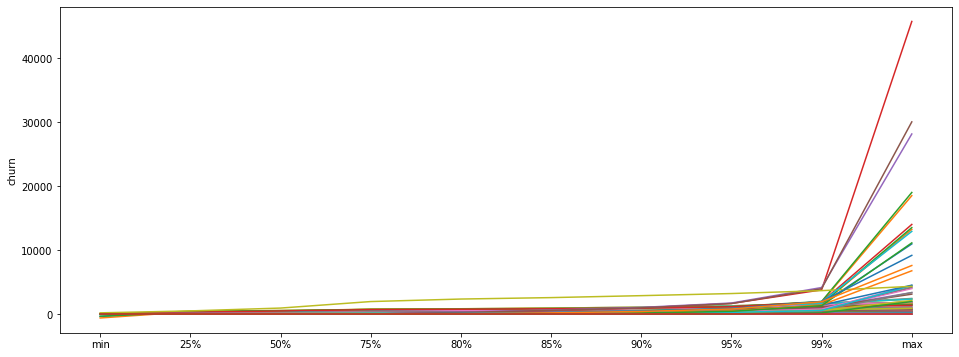

In [69]:
# Plotting for outliers as we did previously
plt.figure(figsize=( 16,6))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in df_final_desc.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= df_final_desc.loc[i,col], x= list(range(0,len(col))))

In [70]:
# Dropping Outlies
for i in df_final_desc.index:
    df_final.drop(df_final[(df_final[i] > df_final_desc.loc[i, '99%']).values].index, inplace= True, axis= 0)

In [71]:
# Redefining the description dataframe
df_final_desc= df_final[df_final_desc.index].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T 

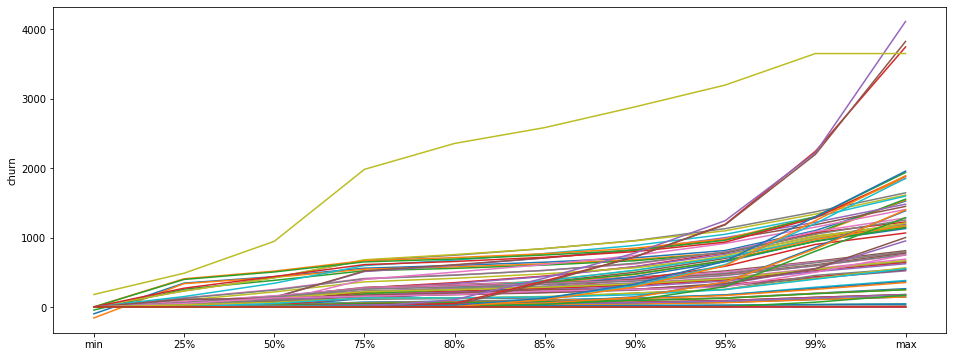

In [72]:
# Plotting for outliers as we did previously
plt.figure(figsize=( 16,6))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in df_final_desc.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= df_final_desc.loc[i,col], x= list(range(0,len(col))))

In [73]:
# Checking the value_counts of the churn variable
# Dropping any more row due to outliers may result in major data loss 
# Also the value in the above plot are increasing gradually for the most part
# Now we will analyse the columns
df_final.churn.value_counts()

0    12081
1     1209
Name: churn, dtype: int64

In [74]:
# Sorting the description dataframe by mean
df_final_desc.sort_values(by= 'mean', ascending= True)

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
sachet_3g_8,13290.0,0.061475,0.323971,0.0,0.0000,0.000,0.00,0.000,0.000,0.000,0.0000,2.0000,4.00
sachet_3g_6,13290.0,0.069451,0.321888,0.0,0.0000,0.000,0.00,0.000,0.000,0.000,1.0000,2.0000,3.00
sachet_3g_7,13290.0,0.070880,0.342099,0.0,0.0000,0.000,0.00,0.000,0.000,0.000,1.0000,2.0000,4.00
churn,13290.0,0.090971,0.287578,0.0,0.0000,0.000,0.00,0.000,0.000,0.000,1.0000,1.0000,1.00
monthly_2g_8,13290.0,0.100150,0.324078,0.0,0.0000,0.000,0.00,0.000,0.000,0.000,1.0000,1.0000,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
total_og_mou_7,13290.0,475.994211,324.883330,0.0,230.0725,418.010,679.93,754.744,841.735,951.899,1097.1510,1337.8242,1612.81
total_og_mou_6,13290.0,479.738202,329.056945,0.0,231.8000,421.945,670.97,744.874,841.003,955.717,1128.1935,1370.4555,1644.19
total_rech_amt_7,13290.0,536.896689,230.830891,0.0,396.0000,504.000,649.00,690.200,748.000,819.100,960.0000,1300.0000,1937.00
total_rech_amt_6,13290.0,554.366817,228.918467,0.0,406.0000,516.000,666.00,711.000,766.650,847.000,979.5500,1297.3300,1854.00


In [75]:
# Dropping sep_vbc_3g as it is a 9th month variable
df_final.drop('sep_vbc_3g', inplace= True, axis= 1)

In [76]:
# Seperating a df_pca for pca analysis
df_pca= pd.DataFrame(df_final)

In [77]:
# Dropping 'churn', 'sep_vbc_3g' from the description dataframe
df_final_desc.drop(['churn', 'sep_vbc_3g'], inplace= True, axis= 0)

In [78]:
# Dropping columns which have a very small mean, we start with taking the mean '3' 
df_final.drop(df_final_desc[(df_final_desc['mean'] < 3).values].index, inplace= True, axis= 1)

In [79]:
# Dropping from the description dataframe
df_final_desc.drop(df_final_desc[(df_final_desc['mean'] < 3).values].index, inplace= True, axis= 0)

In [80]:
# Checking a slightly higher mean value, this time '20'
df_final_desc[(df_final_desc['mean'] < 20).values]

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
std_ic_t2m_mou_6,13290.0,15.564462,23.145640,0.0,0.46,6.17,20.34,25.744,33.8865,45.681,66.121,108.8999,146.94
std_ic_t2m_mou_7,13290.0,15.912405,23.477115,0.0,0.41,6.20,20.94,26.932,35.0800,46.495,67.301,109.9287,143.21
std_ic_t2m_mou_8,13290.0,13.997014,22.042119,0.0,0.06,5.06,17.64,23.244,30.7900,41.883,61.590,105.6133,143.93
total_rech_num_6,13290.0,10.541309,6.642273,0.0,6.00,9.00,13.00,15.000,17.0000,20.000,24.000,34.0000,42.00
total_rech_num_7,13290.0,10.260572,6.820945,0.0,6.00,8.00,13.00,15.000,17.0000,20.000,24.000,34.0000,42.00
total_rech_num_8,13290.0,8.608051,6.790210,0.0,4.00,7.00,11.00,13.000,15.0000,18.000,23.000,33.0000,41.00


In [81]:
# It seem safe to drop these columns
df_final.drop(df_final_desc[(df_final_desc['mean'] < 20).values].index, inplace= True, axis= 1)

In [82]:
df_final_desc.drop(df_final_desc[(df_final_desc['mean'] < 20).values].index, inplace= True, axis= 0)

In [83]:
# Taking a mean of '100'
df_final_desc[(df_final_desc['mean'] < 100).values]

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
loc_og_t2t_mou_6,13290.0,49.471479,59.905540,0.0,8.390,28.330,67.7100,82.914,101.3950,129.099,174.1385,283.9302,380.91
loc_og_t2t_mou_7,13290.0,48.616228,57.623018,0.0,8.645,28.735,66.8050,81.182,98.6625,124.130,172.8445,268.0608,365.36
loc_og_t2t_mou_8,13290.0,44.653828,55.313607,0.0,6.560,25.540,60.4375,73.848,93.2515,117.667,164.1625,253.4555,351.64
loc_ic_t2t_mou_6,13290.0,38.958482,43.240992,0.0,7.830,24.460,55.2375,65.560,78.6400,97.562,130.1725,197.3696,263.14
loc_ic_t2t_mou_7,13290.0,38.829059,42.395943,0.0,8.415,25.260,54.1750,64.244,77.6865,96.515,128.1465,194.4277,247.91
loc_ic_t2t_mou_8,13290.0,36.672008,41.467202,0.0,7.130,23.930,51.2900,61.064,74.6400,93.038,124.9855,190.5333,248.56
std_ic_mou_6,13290.0,24.268252,30.791965,0.0,2.480,12.770,33.8200,41.490,51.8425,66.865,91.0875,138.6688,179.71
std_ic_mou_7,13290.0,24.773739,31.256562,0.0,2.440,13.110,34.8300,42.630,54.1230,68.245,92.4355,138.2455,177.18
std_ic_mou_8,13290.0,21.724802,29.132176,0.0,1.590,10.985,29.5400,37.220,47.0030,61.020,86.4765,131.4213,175.58
last_day_rch_amt_6,13290.0,89.919112,84.086999,0.0,30.000,100.000,110.0000,120.000,128.0000,200.000,252.0000,455.0000,550.00


In [84]:
# These values can be dropped because the occur almost exactly in the same way accross the three months
df_final.drop(df_final_desc[(df_final_desc['mean'] < 100).values].index, inplace= True, axis= 1)

In [85]:
df_final_desc.drop(df_final_desc[(df_final_desc['mean'] < 100).values].index, inplace= True, axis= 0)

In [86]:
# We will continue this form of cleaning in which we will remove values which occur similarly accross the three months
# As they will not contribute to predictions and only introduce noise and as we already have an unbalanced dataset
# Noise could hinder our ability to determine useful variables
df_final_desc[(df_final_desc['mean'] < 250).values]

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
onnet_mou_6,13290.0,207.533675,247.589917,0.0,39.5300,108.180,275.0200,350.520,445.2625,579.999,784.7680,1068.8443,1223.66
onnet_mou_7,13290.0,201.705968,240.332101,0.0,38.0875,103.910,269.8875,338.136,438.0400,579.103,758.5225,1016.2353,1193.71
onnet_mou_8,13290.0,171.492940,222.524271,0.0,27.9325,84.950,213.2375,273.070,356.9340,499.808,699.5450,992.7433,1176.09
loc_og_t2m_mou_6,13290.0,130.789818,128.219829,0.0,30.2900,91.485,195.6875,228.340,267.3400,318.960,398.8435,543.5172,653.39
loc_og_t2m_mou_7,13290.0,130.561046,124.785591,0.0,31.7825,94.175,194.3375,223.866,265.4100,314.199,388.6265,526.1155,638.84
loc_og_t2m_mou_8,13290.0,120.151439,121.019806,0.0,24.9600,85.140,179.7875,211.282,245.7950,294.594,372.6710,508.3903,622.58
loc_og_mou_6,13290.0,184.221608,163.823282,0.0,49.8800,141.075,281.9875,321.394,366.0330,426.617,518.9950,657.0150,810.48
loc_og_mou_7,13290.0,183.218029,159.397594,0.0,52.5325,144.035,278.4050,314.996,362.8530,418.250,503.0110,646.5520,785.78
loc_og_mou_8,13290.0,168.898223,156.079650,0.0,40.1450,131.910,259.1800,297.344,339.3995,398.398,483.5140,637.1600,793.83
std_og_t2t_mou_6,13290.0,146.037223,245.025780,0.0,0.0000,15.720,184.4075,267.660,382.8690,524.896,738.8210,1022.9947,1172.16


In [87]:
# features to be dropped
feature_drop= ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_og_mou_8','loc_og_mou_7','loc_og_mou_6','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']

In [88]:
# Dropping from final dataframe
df_final.drop(feature_drop, inplace= True, axis= 1)

In [89]:
# Dropping from description dataframe
df_final_desc.drop(feature_drop, inplace= True, axis= 0)

In [90]:
# Visualizing description dataframe
df_final_desc

,count,mean,std,min,25%,50%,75%,80%,85%,90%,95%,99%,max
arpu_6,13290.0,466.520077,191.085615,-98.552,343.7850,436.6355,558.38575,598.1332,644.82575,708.7378,812.78615,1100.60637,1525.818
arpu_7,13290.0,452.244692,184.725268,-158.963,336.2040,426.4445,544.00000,577.3792,620.82765,682.1459,783.42900,1047.10275,1540.743
arpu_8,13290.0,395.878907,222.827250,-44.920,256.5530,382.8910,521.00950,556.0626,603.26280,666.0387,776.54290,1059.70434,1553.415
onnet_mou_6,13290.0,207.533675,247.589917,0.000,39.5300,108.1800,275.02000,350.5200,445.26250,579.9990,784.76800,1068.84430,1223.660
onnet_mou_7,13290.0,201.705968,240.332101,0.000,38.0875,103.9100,269.88750,338.1360,438.04000,579.1030,758.52250,1016.23530,1193.710
onnet_mou_8,13290.0,171.492940,222.524271,0.000,27.9325,84.9500,213.23750,273.0700,356.93400,499.8080,699.54500,992.74330,1176.090
offnet_mou_6,13290.0,302.712712,235.102509,0.000,130.2150,250.9350,410.71750,461.4440,526.57950,619.1070,794.56100,1086.00400,1282.160
offnet_mou_7,13290.0,297.453551,233.365072,0.000,126.1450,241.8200,404.47750,457.2320,526.42050,629.8100,790.54700,1048.74550,1252.030
offnet_mou_8,13290.0,260.657547,220.082959,0.000,97.7400,216.2600,361.36000,412.6800,476.90050,563.3820,716.12600,995.00720,1209.330
std_og_t2t_mou_6,13290.0,146.037223,245.025780,0.000,0.0000,15.7200,184.40750,267.6600,382.86900,524.8960,738.82100,1022.99470,1172.160


In [91]:
# Dropping any values less than zero as they are Outliers

df_final.drop(df_final[df_final.values < 0].index, inplace= True)

In [92]:
# Redefining the description dataframe
df_final_desc= df_final[df_final_desc.index].describe(percentiles= [0.25,0.50,0.75,0.8,0.85,0.9,0.95,0.99]).T 

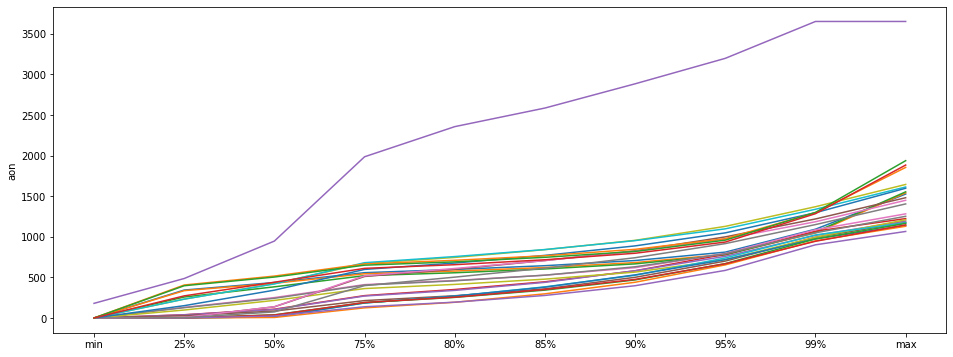

In [93]:
# Plotting percentiles
plt.figure(figsize=( 16,6))
plt.xticks(ticks= list(range(0,10)),labels= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max'])
for i in df_final_desc.index:
    col= ['min', '25%', '50%', '75%', '80%', '85%', '90%','95%','99%','max']
    sns.lineplot(y= df_final_desc.loc[i,col], x= list(range(0,len(col))))

In [94]:
# As we can see the data is gradually increasing which means all outliers have been handled while retaining 13237 data points
# Also the dataframe has been greatly reduced to only 27 features
df_final.shape

(13237, 27)

### PCA Analysis will be done on the dataframe df_pca not on df_final, the sole purpose of creating two dataframes was to determine important variables. This will be done with the df_final dataframe

# Model Building

In [95]:
# Creating a correlation matrix
corr_mat= df_final.corr()

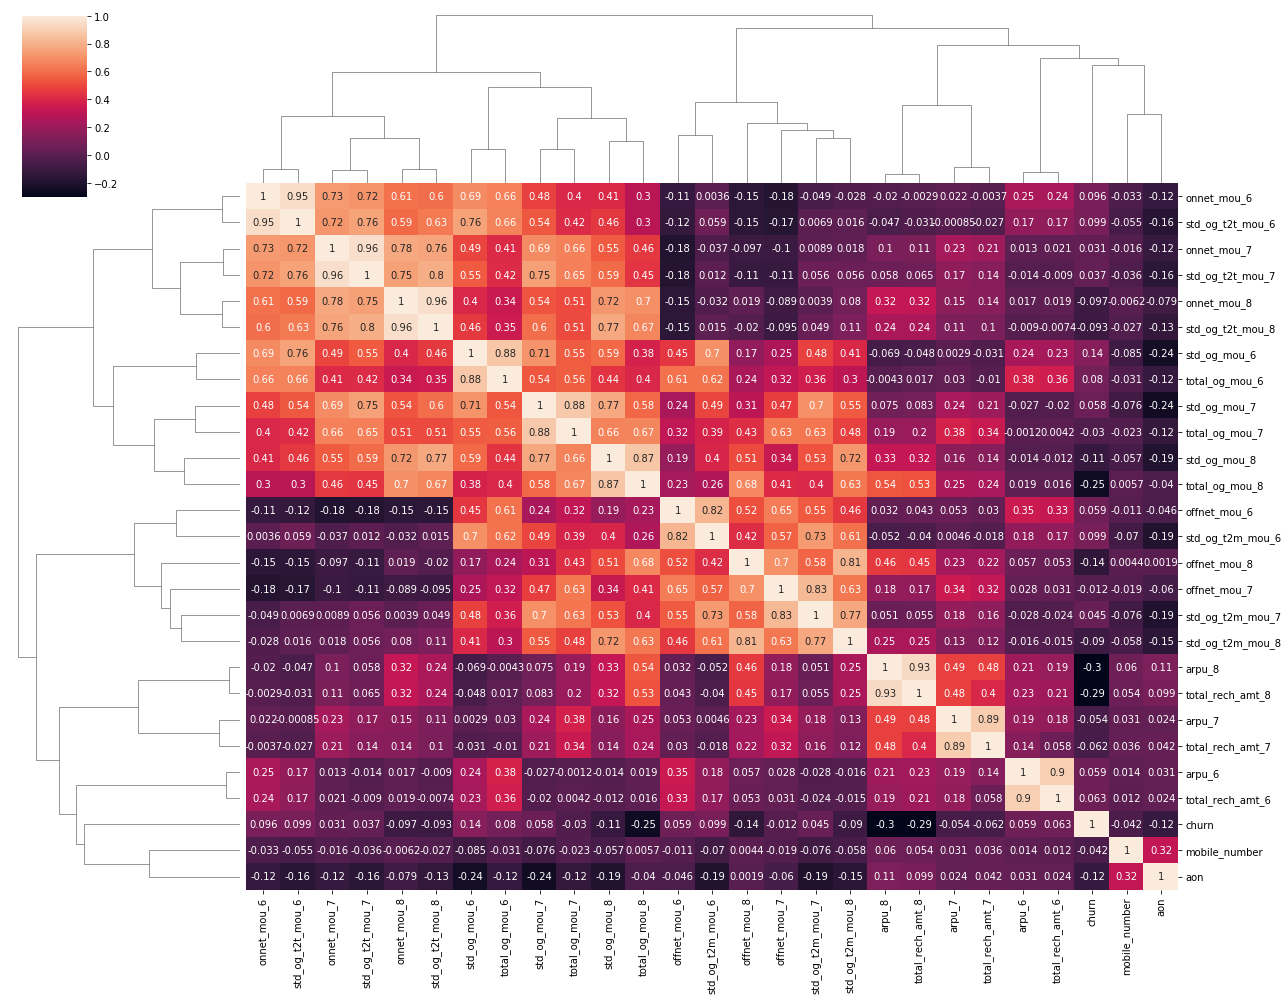

In [96]:
# Creating a clustermap to view any obvious correlations
sns.clustermap(corr_mat, annot= True, figsize=(18, 14))

In [97]:
# Dropping the mobile_number column as it is irrelevent
df_final.drop('mobile_number', inplace= True, axis= 1)

In [98]:
# Value_counts for the churn variable
df_final.churn.value_counts()

0    12055
1     1182
Name: churn, dtype: int64

In [99]:
# Creating a model dataframe
model_df= pd.DataFrame(df_final)

In [100]:
# Resetting the index of the model dataframe
model_df.reset_index(inplace= True)

In [101]:
# Removing the column 'index'
model_df.drop('index', inplace= True, axis= 1)

In [102]:
# Creating X and y variables
y= model_df.pop('churn')

In [103]:
X= model_df

In [104]:
# Doing a train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7,random_state= 100 )

In [105]:
# Creating a scaler object
scaler_X= StandardScaler()

In [106]:
# Storing columns in a column variable
X_col= X.columns

In [107]:
# Scaling X_train and X_test
X_train= pd.DataFrame(scaler_X.fit_transform(X_train), index= X_train.index, columns= X_col)

In [108]:
X_test= pd.DataFrame(scaler_X.transform(X_test),index= X_test.index, columns= X_col)

In [109]:
# Creating a LogisticRegression instance
model= LogisticRegression()

In [110]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
# Predicting data
y_pred= model.predict(X_test)

In [112]:
# Creating a confusion matrix 
confusion_mat= confusion_matrix(y_test, y_pred)

In [113]:
confusion_df= pd.DataFrame(confusion_mat, columns= ['Actual_Positive', 'Actual_Negative'], index= ['Pred_Positive', 'Pred_Negative'])

In [114]:
# The confusion matrix
confusion_df

,Actual_Positive,Actual_Negative
Pred_Positive,3572,69
Pred_Negative,221,110


In [115]:
# Calculating accuracy, recall and f1 scores
acc_score= accuracy_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f_score= f1_score(y_test, y_pred)

In [116]:
# Calculating precision score
prec_score= precision_score(y_test, y_pred)

In [117]:
# Calculating auc score
auc_score= roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

In [118]:
scores_df= pd.DataFrame([acc_score, auc_score, prec_score, rec_score, f_score ], index= ['accuracy', 'auc', 'precision', 'recall', 'f1' ], columns= ['scores'])

In [119]:
# Even though the accuracy, auc is great
# The precision is low and the f1 and recall is bad
# Our recall needs to be good, lesser false negatives
# This is because of the imbalance in our data set
scores_df

,scores
accuracy,0.926989
auc,0.880619
precision,0.614525
recall,0.332326
f1,0.431373


## Imbalance Handling

In [120]:
# Creating folds for cross validation
folds= KFold(n_splits= 10, shuffle= True, random_state= 100)

In [121]:
# hyper parameters for RFE
hyper_params_rfe= [{'n_features_to_select': list(range(1, 27))}]

In [122]:
# Creating a dataframe UP by concatenatin X_train and y_train
UP = pd.concat([X_train,y_train], axis= 1)

In [123]:
# Creating two dataframes one with our churn variable and one without from the UP dataframe
not_churn = UP[UP.churn==0]
churn = UP[UP.churn==1]


In [124]:
# Upsampling our churn variable
churn_upsampled= resample(churn, replace= True, n_samples= len(not_churn), random_state= 10)

In [125]:
# Creating upsampled dataframe
upsampled= pd.concat([not_churn, churn_upsampled])

In [126]:
# Seperating X and y variables 
y_train_us = upsampled.pop('churn')
X_train_us = upsampled

In [127]:
# Creating downsampled dataframe
churn_downsampled= resample(not_churn, replace= False, n_samples= len(churn), random_state= 10)

In [128]:
downsampled = pd.concat([churn_downsampled, churn])

In [129]:
# Seperating X and y variables 
y_train_ds = downsampled.pop('churn')
X_train_ds = downsampled

In [130]:
# Carrying out a grid search for min features for RFE on our upsampled data
# We will use the f1 score as a scoring criteria
# Note: jobs are carried out in parallel, i.e. all processors on the machine will be used
lm= LogisticRegression()
lm.fit(X_train_us, y_train_us)
rfe_cv= RFE(lm)

Model_cv_us=  GridSearchCV(estimator = rfe_cv, 
                        param_grid = hyper_params_rfe, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs= -1)      

Model_cv_us.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:   57.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                        

In [131]:
# Creating results dataframe for upsampled data
cv_results_rfe_us = pd.DataFrame(Model_cv_us.cv_results_)

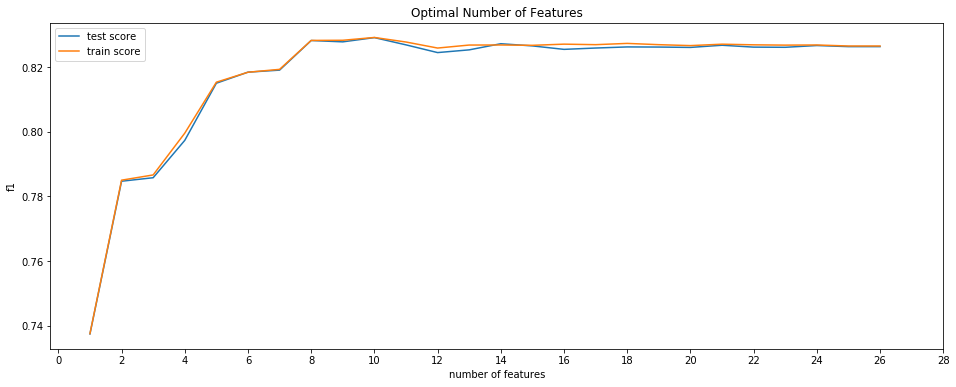

In [132]:
# Plotting the results
# Clearly we can see that upsampling has had an effect on the f1 score 
# The max attainable f1 score is approx 0.85 which is much greater than our previous score of 0.43
# 10 seem to be the best no. of features to select
plt.figure(figsize=(16,6))
plt.plot(cv_results_rfe_us.param_n_features_to_select, cv_results_rfe_us.mean_test_score)
plt.plot(cv_results_rfe_us.param_n_features_to_select, cv_results_rfe_us.mean_train_score)
plt.xlabel('number of features')
plt.xticks(np.arange(0,30,2))
plt.ylabel('f1')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [133]:
# Carrying out a grid search for min features for RFE on our downscaled data
# We will use the f1 score as a scoring criteria
# Note: jobs are carried out in parallel, i.e. all processors on the machine will be used
lm= LogisticRegression()
lm.fit(X_train_us, y_train_us)
rfe_cv= RFE(lm)

Model_cv_ds=  GridSearchCV(estimator = rfe_cv, 
                        param_grid = hyper_params_rfe, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs= -1)      

Model_cv_ds.fit(X_train_ds, y_train_ds)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    4.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                        

In [134]:
# Creating results dataframe for downsampled data
cv_results_rfe_ds = pd.DataFrame(Model_cv_ds.cv_results_)

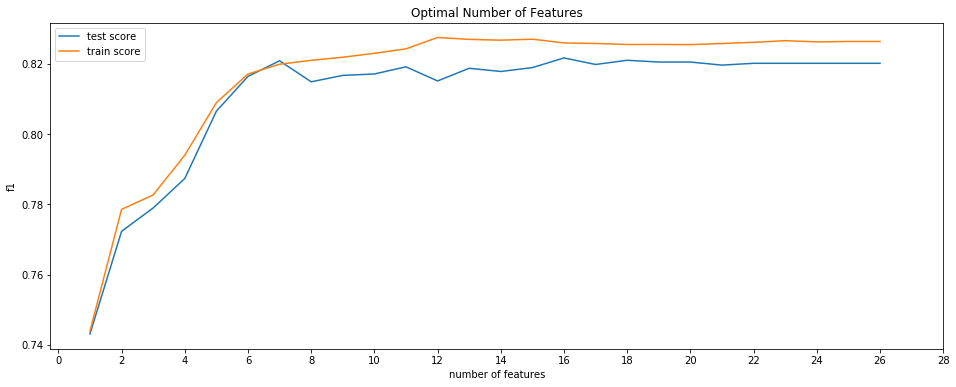

In [135]:
# Plotting the results
# The results of our upsampled data was better since we could achieve a higher f1 score
# also upsampling does not cause us to loose any data
# we will go forward with the upsampled data
plt.figure(figsize=(16,6))
plt.plot(cv_results_rfe_ds.param_n_features_to_select, cv_results_rfe_ds.mean_test_score)
plt.plot(cv_results_rfe_ds.param_n_features_to_select, cv_results_rfe_ds.mean_train_score)
plt.xlabel('number of features')
plt.xticks(np.arange(0,30,2))
plt.ylabel('f1')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [136]:
# Creating a rfe model with 10 as our hyperparameter
rfe_model_cv= LogisticRegression(class_weight= 'balanced')
rfe_cv= RFE(rfe_model_cv, 10)

In [137]:
# fitting data
rfe_cv.fit(X_train_us,y_train_us)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [138]:
# Predictions
y_pred_rfe_cv= rfe_cv.predict(X_test)

In [139]:
# Calculating scores
acc_score_us= accuracy_score(y_test, y_pred_rfe_cv)
rec_score_us= recall_score(y_test, y_pred_rfe_cv)
f1_score_us= f1_score(y_test, y_pred_rfe_cv)

In [140]:
# Calculating precision score
prec_score_us= precision_score(y_test, y_pred_rfe_cv)

In [141]:
# Calculating auc score
auc_score_us= roc_auc_score(y_test, rfe_cv.predict_proba(X_test)[:,1])

In [142]:
scores_df_us= pd.DataFrame([acc_score_us, auc_score_us, prec_score_us, rec_score_us, f1_score_us ], index= ['accuracy', 'auc', 'precision', 'recall', 'f1' ], columns= ['scores'])

In [143]:
# Our recall has increased 
scores_df_us

,scores
accuracy,0.827543
auc,0.880284
precision,0.298864
recall,0.794562
f1,0.434352


In [144]:
# Creating a confusion matrix for upsampled data
confusion_mat_us= confusion_matrix(y_test, y_pred_rfe_cv)

confusion_df_us= pd.DataFrame(confusion_mat_us, columns= ['Actual_Positive', 'Actual_Negative'], index= ['Pred_Positive', 'Pred_Negative'])

# The confusion matrix looks good because the number of  the lower number of false negatives
confusion_df_us

,Actual_Positive,Actual_Negative
Pred_Positive,3024,617
Pred_Negative,68,263


In [145]:
# From an RFE standpoint these seem to be the important variables
impvar_rfe= pd.DataFrame(list(X_col[rfe_cv.support_]), columns= ['variables'])
impvar_rfe

,variables
0,arpu_7
1,onnet_mou_8
2,offnet_mou_8
3,std_og_t2t_mou_7
4,std_og_t2t_mou_8
5,std_og_t2m_mou_7
6,std_og_mou_7
7,std_og_mou_8
8,total_og_mou_8
9,total_rech_amt_8


# RandomForest

In [146]:
# Creating a Random Forest instance
rfc= RandomForestClassifier()

In [147]:
# Defining hyperparameters
hp_rfc_depth= {'max_depth': list(range(2,20)) }

In [148]:
hp_rfc_nest= {'n_estimators': list(range(2,30))}

In [149]:
hp_rfc_mss= {'min_samples_split': list(range(2,20))}

In [150]:
# Grid Search using recall as score
lm= RandomForestClassifier(n_jobs= -1)
lm.fit(X_train_us, y_train_us)
Model_cv_rfc=  GridSearchCV(estimator = lm, 
                        param_grid = hp_rfc_depth, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs= -1)      

Model_cv_rfc.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   39.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_scor

In [151]:
# Creating result dataframe for depth
cv_results_depth = pd.DataFrame(Model_cv_rfc.cv_results_)

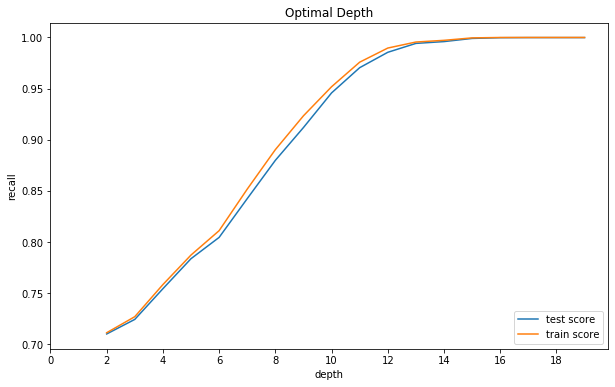

In [152]:
# Plotting results
# Clearly optimal depth is 14
plt.figure(figsize=(10,6))
plt.plot(cv_results_depth.param_max_depth, cv_results_depth.mean_test_score)
plt.plot(cv_results_depth.param_max_depth, cv_results_depth.mean_train_score)
plt.xlabel('depth')
plt.xticks(np.arange(0,20,2))
plt.ylabel('recall')
plt.title("Optimal Depth")
plt.legend(['test score', 'train score'], loc='lower right')

In [153]:
# Grid search for n_estimators
# scoring is recall
lm= RandomForestClassifier()
lm.fit(X_train_us, y_train_us)

Model_cv=  GridSearchCV(estimator = lm, 
                        param_grid = hp_rfc_nest, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs= -1)      

Model_cv.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   13.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [154]:
cv_results_nest = pd.DataFrame(Model_cv.cv_results_)

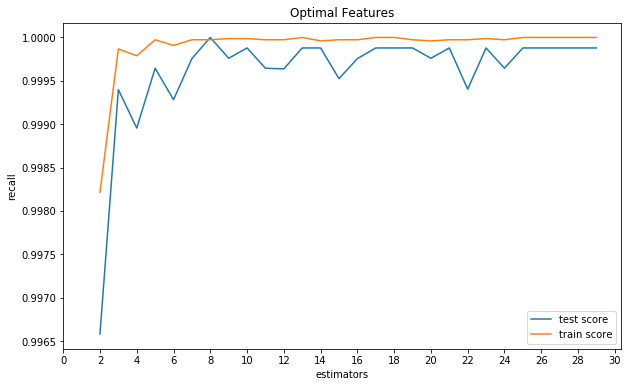

In [155]:
# Plotting data
# 12 seems to be optimal
plt.figure(figsize=(10,6))
plt.plot(cv_results_nest.param_n_estimators, cv_results_nest.mean_test_score)
plt.plot(cv_results_nest.param_n_estimators, cv_results_nest.mean_train_score)
plt.xlabel('estimators')
plt.xticks(np.arange(0,32,2))
plt.ylabel('recall')
plt.title("Optimal Features")
plt.legend(['test score', 'train score'], loc='lower right')

In [156]:
# Gridsearch for min_sample_split
# scoring is recall
lm= RandomForestClassifier(n_jobs= -1 )
lm.fit(X_train_us, y_train_us)

Model_cv=  GridSearchCV(estimator = lm, 
                        param_grid = hp_rfc_mss, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs= -1)      

Model_cv.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   52.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_scor

In [157]:
cv_results_mss = pd.DataFrame(Model_cv.cv_results_)

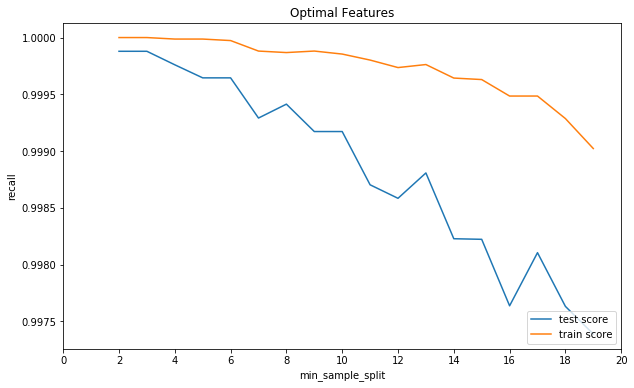

In [158]:
# Plotting the data
# 4 seems to be the optimum value
plt.figure(figsize=(10,6))
plt.plot(cv_results_mss.param_min_samples_split, cv_results_mss.mean_test_score)
plt.plot(cv_results_mss.param_min_samples_split, cv_results_mss.mean_train_score)
plt.xlabel('min_sample_split')
plt.xticks(np.arange(0,22,2))
plt.ylabel('recall')
plt.title("Optimal Features")
plt.legend(['test score', 'train score'], loc='lower right')

In [159]:
# creating a rfc model instance
rfc= RandomForestClassifier(random_state= 100, n_estimators= 15, max_depth= 14, min_samples_split= 4, n_jobs= -1)

In [160]:
# Fitting the data
rfc.fit(X_train_us, y_train_us)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [161]:
#Predicting data
y_pred_rfc= rfc.predict(X_test)

In [162]:
# Calculating scores
acc_score_rfc= accuracy_score(y_test, y_pred_rfc)
rec_score_rfc= recall_score(y_test, y_pred_rfc)
f1_score_rfc= f1_score(y_test, y_pred_rfc)

# Calculating precision score
prec_score_rfc= precision_score(y_test, y_pred_rfc)

# Calculating auc score
auc_score_rfc= roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])

In [163]:

scores_df_us= pd.DataFrame([acc_score_rfc, auc_score_rfc, prec_score_rfc, rec_score_rfc, f1_score_rfc ], index= ['accuracy', 'auc', 'precision', 'recall', 'f1' ], columns= ['scores'])

# Our recall has seems to have decreased even though all other scores have increased 
scores_df_us


,scores
accuracy,0.919688
auc,0.863852
precision,0.517045
recall,0.549849
f1,0.532943


In [164]:
# Creating a confusion matrix for upsampled data
confusion_mat_rfc= confusion_matrix(y_test, y_pred_rfc)

confusion_df_rfc= pd.DataFrame(confusion_mat_rfc, columns= ['Actual_Positive', 'Actual_Negative'], index= ['Pred_Positive', 'Pred_Negative'])

# the number of false negatives has increased
confusion_df_rfc

,Actual_Positive,Actual_Negative
Pred_Positive,3471,170
Pred_Negative,149,182


In [165]:
# Creating dataframe for imp features
impvar_rfc= pd.DataFrame({'Importance': rfc.feature_importances_,'Feature': X_col}).sort_values(by='Importance', ascending= False)

In [166]:
impvar_rfc.reset_index(inplace= True)

In [167]:
impvar_rfc.drop('index', axis= 1,  inplace= True)

In [168]:
# top 10 import features according to random forest
impvar_rfc.head(10)

,Importance,Feature
0,0.164123,total_rech_amt_8
1,0.147362,total_og_mou_8
2,0.111543,arpu_8
3,0.048296,offnet_mou_8
4,0.039520,total_og_mou_7
5,0.034461,total_og_mou_6
6,0.034257,std_og_mou_7
7,0.030440,std_og_mou_8
8,0.030041,arpu_7
9,0.027237,onnet_mou_6


# Statsmodels

In [169]:
# Statsmodels on rfe selected columns
X_train_sm= sm.add_constant(X_train_us[X_col[rfe_cv.support_]])

In [170]:
# Logistic model
sm_model= sm.Logit(y_train_us.values.reshape(-1,1), X_train_sm ).fit()

Optimization terminated successfully.
         Current function value: 0.430770
         Iterations 7


In [171]:
# model summary
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16828
Model:                          Logit   Df Residuals:                    16817
Method:                           MLE   Df Model:                           10
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3785
Time:                        23:02:17   Log-Likelihood:                -7249.0
converged:                       True   LL-Null:                       -11664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1105      0.028    -39.684      0.000      -1.165      -1.056
arpu_7               0.2736      0.024     11.438      0.000       0.227       0.320
onnet_mou_8          1.3765      0.106     12.964      0.000       1.168       1.585
offnet_mou_8         1.8696      0.088     21.333      0.000       1.698       2.041
std_og_t2t_mou_7     1.9388      0.463      4.184      0.000       1.031       2.847
std_og_t2t_mou_8     0.6228      0.157      3.960      0.000       0.315       0.931
std_og_t2m_mou_7     1.9315      0.432      4.466      0.000       1.084       2.779
std_og_mou_7        -2.2484      0.649     -3.464      0.001      -3.520      -0.976
std_og_mou_8         0.9033      0.109      8.320      0.000       0.691       1.116
total_og_mou_8      -4.3041      0.105    -41.079      0.000      -4.509      -4.099
total_rech_amt_8    -0.8841      0.036    -24.444      0.000      -0.955      -0.813
====================================================================================
"""

In [172]:
# checking for variance
columns_vif= X_train_sm.columns
vif= [variance_inflation_factor(X_train_sm.values, x[0]) for x in list(enumerate(columns_vif)) ]
VIF= pd.DataFrame({'var_names': columns_vif, 'VIF': vif}, index= range(1, (len(columns_vif) + 1)))
VIF.sort_values(by= 'VIF', ascending= False, inplace= True)
VIF

,var_names,VIF
8,std_og_mou_7,631.362739
5,std_og_t2t_mou_7,329.819641
7,std_og_t2m_mou_7,298.516085
6,std_og_t2t_mou_8,26.025418
9,std_og_mou_8,13.815369
3,onnet_mou_8,12.975211
10,total_og_mou_8,9.653606
4,offnet_mou_8,6.134959
11,total_rech_amt_8,2.411051
2,arpu_7,1.346440


In [173]:
# Dropping high variance variable std_og_mou_7
X_train_sm.drop('std_og_mou_7', inplace= True,axis= 1)
sm_model= sm.Logit(y_train_us.values.reshape(-1,1), X_train_sm).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.431131
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16828
Model:                          Logit   Df Residuals:                    16818
Method:                           MLE   Df Model:                            9
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3780
Time:                        23:02:17   Log-Likelihood:                -7255.1
converged:                       True   LL-Null:                       -11664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1053      0.028    -39.673      0.000      -1.160      -1.051
arpu_7               0.2791      0.024     11.698      0.000       0.232       0.326
onnet_mou_8          1.3585      0.105     12.913      0.000       1.152       1.565
offnet_mou_8         1.8093      0.085     21.281      0.000       1.643       1.976
std_og_t2t_mou_7     0.3370      0.032     10.489      0.000       0.274       0.400
std_og_t2t_mou_8     0.5854      0.156      3.758      0.000       0.280       0.891
std_og_t2m_mou_7     0.4374      0.032     13.865      0.000       0.376       0.499
std_og_mou_8         0.9020      0.108      8.322      0.000       0.690       1.114
total_og_mou_8      -4.2281      0.102    -41.654      0.000      -4.427      -4.029
total_rech_amt_8    -0.8772      0.036    -24.399      0.000      -0.948      -0.807
====================================================================================
"""

In [174]:
columns_vif= X_train_sm.columns
vif= [variance_inflation_factor(X_train_sm.values, x[0]) for x in list(enumerate(columns_vif)) ]
VIF= pd.DataFrame({'var_names': columns_vif, 'VIF': vif}, index= range(1, (len(columns_vif) + 1)))
VIF.sort_values(by= 'VIF', ascending= False, inplace= True)
VIF

,var_names,VIF
6,std_og_t2t_mou_8,26.017113
8,std_og_mou_8,13.802677
3,onnet_mou_8,12.959706
9,total_og_mou_8,9.448058
4,offnet_mou_8,6.040866
10,total_rech_amt_8,2.410962
5,std_og_t2t_mou_7,2.110614
7,std_og_t2m_mou_7,2.060554
2,arpu_7,1.326800
1,const,1.276730


In [175]:
# Dropping 
X_train_sm.drop('std_og_t2t_mou_8', inplace= True, axis= 1)
sm_model= sm.Logit(y_train_us.values.reshape(-1,1), X_train_sm ).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.431552
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16828
Model:                          Logit   Df Residuals:                    16819
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3774
Time:                        23:02:17   Log-Likelihood:                -7262.2
converged:                       True   LL-Null:                       -11664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1070      0.028    -39.668      0.000      -1.162      -1.052
arpu_7               0.2826      0.024     11.840      0.000       0.236       0.329
onnet_mou_8          1.6600      0.070     23.617      0.000       1.522       1.798
offnet_mou_8         1.6021      0.063     25.544      0.000       1.479       1.725
std_og_t2t_mou_7     0.3530      0.032     10.983      0.000       0.290       0.416
std_og_t2m_mou_7     0.4136      0.031     13.537      0.000       0.354       0.474
std_og_mou_8         1.1462      0.087     13.143      0.000       0.975       1.317
total_og_mou_8      -4.1063      0.094    -43.644      0.000      -4.291      -3.922
total_rech_amt_8    -0.8863      0.036    -24.716      0.000      -0.957      -0.816
====================================================================================
"""

In [176]:
columns_vif= X_train_sm.columns
vif= [variance_inflation_factor(X_train_sm.values, x[0]) for x in list(enumerate(columns_vif)) ]
VIF= pd.DataFrame({'var_names': columns_vif, 'VIF': vif}, index= range(1, (len(columns_vif) + 1)))
VIF.sort_values(by= 'VIF', ascending= False, inplace= True)
VIF

,var_names,VIF
8,total_og_mou_8,8.937260
7,std_og_mou_8,8.926159
3,onnet_mou_8,5.479969
4,offnet_mou_8,3.738509
9,total_rech_amt_8,2.409978
5,std_og_t2t_mou_7,2.052465
6,std_og_t2m_mou_7,1.971964
2,arpu_7,1.326189
1,const,1.276619


In [177]:
# Dropping total_og_mou_8
X_train_sm.drop('total_og_mou_8', inplace= True, axis= 1)
sm_model= sm.Logit(y_train_us.values.reshape(-1,1), X_train_sm).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.530247
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16828
Model:                          Logit   Df Residuals:                    16820
Method:                           MLE   Df Model:                            7
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.2350
Time:                        23:02:17   Log-Likelihood:                -8923.0
converged:                       True   LL-Null:                       -11664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6704      0.022    -30.641      0.000      -0.713      -0.628
arpu_7               0.1891      0.020      9.392      0.000       0.150       0.229
onnet_mou_8          0.5304      0.051     10.379      0.000       0.430       0.631
offnet_mou_8         0.2368      0.036      6.536      0.000       0.166       0.308
std_og_t2t_mou_7     0.4088      0.029     13.933      0.000       0.351       0.466
std_og_t2m_mou_7     0.5695      0.029     19.391      0.000       0.512       0.627
std_og_mou_8        -1.1075      0.061    -18.183      0.000      -1.227      -0.988
total_rech_amt_8    -1.2675      0.031    -41.246      0.000      -1.328      -1.207
====================================================================================
"""

In [178]:
columns_vif= X_train_sm.columns
vif= [variance_inflation_factor(X_train_sm.values, x[0]) for x in list(enumerate(columns_vif)) ]
VIF= pd.DataFrame({'var_names': columns_vif, 'VIF': vif}, index= range(1, (len(columns_vif) + 1)))
VIF.sort_values(by= 'VIF', ascending= False, inplace= True)
VIF

,var_names,VIF
7,std_og_mou_8,6.814342
3,onnet_mou_8,4.973961
4,offnet_mou_8,2.974436
8,total_rech_amt_8,2.119964
5,std_og_t2t_mou_7,2.050950
6,std_og_t2m_mou_7,1.966430
2,arpu_7,1.325778
1,const,1.182850


In [179]:
# Dropping std_og_mou_8
X_train_sm.drop('std_og_mou_8', inplace= True, axis= 1)
sm_model= sm.Logit(y_train_us.values.reshape(-1,1), X_train_sm).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.540429
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                16828
Model:                          Logit   Df Residuals:                    16821
Method:                           MLE   Df Model:                            6
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.2203
Time:                        23:02:18   Log-Likelihood:                -9094.3
converged:                       True   LL-Null:                       -11664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6472      0.022    -29.682      0.000      -0.690      -0.605
arpu_7               0.2402      0.020     11.828      0.000       0.200       0.280
onnet_mou_8         -0.1490      0.034     -4.388      0.000      -0.216      -0.082
offnet_mou_8        -0.1440      0.029     -4.904      0.000      -0.202      -0.086
std_og_t2t_mou_7     0.2567      0.027      9.530      0.000       0.204       0.310
std_og_t2m_mou_7     0.2655      0.022     12.013      0.000       0.222       0.309
total_rech_amt_8    -1.2449      0.031    -40.816      0.000      -1.305      -1.185
====================================================================================
"""

In [180]:
columns_vif= X_train_sm.columns
vif= [variance_inflation_factor(X_train_sm.values, x[0]) for x in list(enumerate(columns_vif)) ]
VIF= pd.DataFrame({'var_names': columns_vif, 'VIF': vif}, index= range(1, (len(columns_vif) + 1)))
VIF.sort_values(by= 'VIF', ascending= False, inplace= True)
VIF

,var_names,VIF
3,onnet_mou_8,2.180700
7,total_rech_amt_8,2.112251
5,std_og_t2t_mou_7,1.913882
4,offnet_mou_8,1.903617
6,std_og_t2m_mou_7,1.411192
2,arpu_7,1.295517
1,const,1.173125


In [181]:
# Predictions
y_pred_sm= sm_model.predict(sm.add_constant(X_test[['arpu_7', 'std_og_t2t_mou_7','std_og_t2m_mou_7','total_rech_amt_8','offnet_mou_8', 'onnet_mou_8']])) 

In [182]:
# Calculating scores
acc_score_sm= accuracy_score(y_test, list(map(round, y_pred_sm)))
rec_score_sm= recall_score(y_test, list(map(round, y_pred_sm)))
f1_score_sm= f1_score(y_test, list(map(round, y_pred_sm)))

# Calculating precision score
prec_score_sm= precision_score(y_test, list(map(round, y_pred_sm)))

In [183]:
scores_df_sm= pd.DataFrame([acc_score_sm, prec_score_sm, rec_score_sm, f1_score_sm ], index= ['accuracy', 'precision', 'recall', 'f1' ], columns= ['scores'])

# This has been the Worst uptill now 
scores_df_sm


,scores
accuracy,0.608006
precision,0.029186
recall,0.114804
f1,0.046540


# PCA

In [184]:
# Dropping mobile_number from pca dataframe
df_pca.drop(['mobile_number'], axis= 1, inplace= True)

In [185]:
df_pca.reset_index(inplace= True)

In [186]:
df_pca.drop('index', axis= 1,inplace= True)

In [187]:
# Checking the columns for null values
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13290 entries, 0 to 13289
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              13290 non-null  float64
 1   arpu_7              13290 non-null  float64
 2   arpu_8              13290 non-null  float64
 3   onnet_mou_6         13290 non-null  float64
 4   onnet_mou_7         13290 non-null  float64
 5   onnet_mou_8         13290 non-null  float64
 6   offnet_mou_6        13290 non-null  float64
 7   offnet_mou_7        13290 non-null  float64
 8   offnet_mou_8        13290 non-null  float64
 9   loc_og_t2t_mou_6    13290 non-null  float64
 10  loc_og_t2t_mou_7    13290 non-null  float64
 11  loc_og_t2t_mou_8    13290 non-null  float64
 12  loc_og_t2m_mou_6    13290 non-null  float64
 13  loc_og_t2m_mou_7    13290 non-null  float64
 14  loc_og_t2m_mou_8    13290 non-null  float64
 15  loc_og_mou_6        13290 non-null  float64
 16  loc_

In [188]:
# Creating y variable
y_pca= df_pca.pop('churn')

In [189]:
# Creating X variable
X_pca= df_pca

In [190]:
# Splitting data
X_train_pca, X_test_pca, y_train_pca, y_test_pca= train_test_split(X_pca, y_pca, train_size= 0.7, random_state= 100)

In [191]:
# initializing scaler object
scaler_pca= StandardScaler()

In [192]:
#scaling data
X_train_pca= pd.DataFrame(scaler_pca.fit_transform(X_train_pca), index= X_train_pca.index, columns= X_pca.columns)

In [193]:
X_test_pca= pd.DataFrame(scaler_pca.transform(X_test_pca), index= X_test_pca.index, columns= X_pca.columns)

In [194]:
# Creating dataframe for upsampling
UP_pca = pd.concat([X_train_pca,y_train_pca], axis= 1)

In [195]:
UP_pca

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
5919,-0.113621,-0.425636,1.495510,-0.658071,-0.757583,-0.404021,-0.289278,-0.414881,0.503146,-0.078670,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-0.835022,-0.350704,-0.353413,-0.341771,0
12385,-0.664984,0.181003,0.881887,-0.619779,-0.585360,-0.568866,-0.640752,-0.529375,-0.560508,0.021882,...,-0.31728,-0.306918,-0.221246,-0.209115,5.776833,2.400509,-0.350704,0.107830,0.730085,0
13097,-0.642435,-1.255150,-0.402547,-0.049022,-0.289094,0.056270,-0.405392,-0.317674,-0.422595,2.464710,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-0.877863,-0.350704,-0.353413,-0.341771,0
7703,-0.895095,-0.439658,0.510778,-0.763766,-0.673737,-0.364528,-0.094359,0.382105,1.813326,-0.520053,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-0.821761,-0.350704,-0.353138,-0.341771,0
7332,-0.447485,-0.388569,-0.935630,-0.255582,-0.449844,0.053149,1.799531,0.547012,0.760524,-0.441361,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,1.788492,-0.350704,-0.353413,-0.341771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.239149,-0.586013,-1.509994,-0.726119,-0.813494,-0.778043,2.141307,1.532920,-0.997537,-0.613711,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,1.196875,-0.350704,-0.353413,-0.341771,0
12119,0.028704,-0.008018,0.434786,-0.763847,-0.801980,-0.750765,-0.498342,-0.680784,-0.189814,-0.520390,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-0.299507,6.926029,5.119641,5.930473,0
8039,-0.177024,-0.079070,-0.394892,2.416685,2.523004,0.920756,-0.929764,-1.049046,-0.065466,-0.703837,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-1.117570,-0.350704,-0.353413,-0.341771,1
6936,-1.404909,-0.146091,-0.539432,0.420749,1.864002,0.883119,-0.680896,-0.655237,-0.856910,-0.683996,...,-0.31728,-0.306918,-0.221246,-0.209115,-0.192165,-0.931924,-0.350704,-0.353413,-0.341771,1


In [196]:
# Creating two dataframes one with our churn variable and one without from the UP_pca dataframe
not_churn_pca = UP_pca[UP_pca.churn==0]
churn_pca = UP_pca[UP_pca.churn==1]


In [197]:
# Upsampling our churn variable
churn_upsampled_pca= resample(churn_pca, replace= True, n_samples= len(not_churn_pca), random_state= 100)

In [198]:
# Creating upsampled dataframe
upsampled_pca= pd.concat([not_churn_pca, churn_upsampled_pca])


In [199]:
# Seperating X and y variables 
y_train_upca = upsampled_pca.pop('churn')
X_train_upca = upsampled_pca

In [202]:
# instantiating a pca model
model_pca= PCA(0.9)

In [203]:
# Fitting pca on X_train data
X_train_upca= model_pca.fit_transform(X_train_upca)

In [206]:
# The no. of columns has been reduced to 31
X_train_upca.shape

(16960, 31)

In [205]:
# instantiating a logistic regression model to fit on pca data
model_lr_pca= LogisticRegression()

In [207]:
# fitting the model
model_lr_pca.fit(X_train_upca, y_train_upca) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
# Transforming test data with pca
X_test_pca= model_pca.transform(X_test_pca)

In [209]:
# Shape of test data
X_test_pca.shape

(3987, 31)

In [210]:
# predictions using logistic model fit on pca data
y_pred_pca= model_lr_pca.predict(X_test_pca)

In [214]:
# Calculating scores
acc_score_pca= accuracy_score(y_test_pca, y_pred_pca)
rec_score_pca= recall_score(y_test_pca, y_pred_pca)
f1_score_pca= f1_score(y_test_pca, y_pred_pca)


In [218]:
# Calculating precision score
prec_score_pca= precision_score(y_test_pca, y_pred_pca)

In [216]:
# aoc score
aoc_pca=  roc_auc_score(y_test_pca, y_pred_pca)

In [219]:
# Scores for pca
# By far the best recall
scores_df_sm= pd.DataFrame([acc_score_pca, aoc_pca, prec_score_pca, rec_score_pca, f1_score_pca ], index= ['accuracy', 'aoc', 'precision', 'recall', 'f1' ], columns= ['scores'])
scores_df_sm


,scores
accuracy,0.802358
aoc,0.811945
precision,0.306358
recall,0.823834
f1,0.446629


In [223]:
# Creating a confusion matrix for upsampled data
confusion_mat_pca= confusion_matrix(y_test_pca, y_pred_pca)

confusion_df_pca= pd.DataFrame(confusion_mat_rfc, columns= ['Actual_Positive', 'Actual_Negative'], index= ['Pred_Positive', 'Pred_Negative'])

# the number of false negatives has increased but the number of true positive has increased rendering a better recall
confusion_df_pca

,Actual_Positive,Actual_Negative
Pred_Positive,3471,170
Pred_Negative,149,182


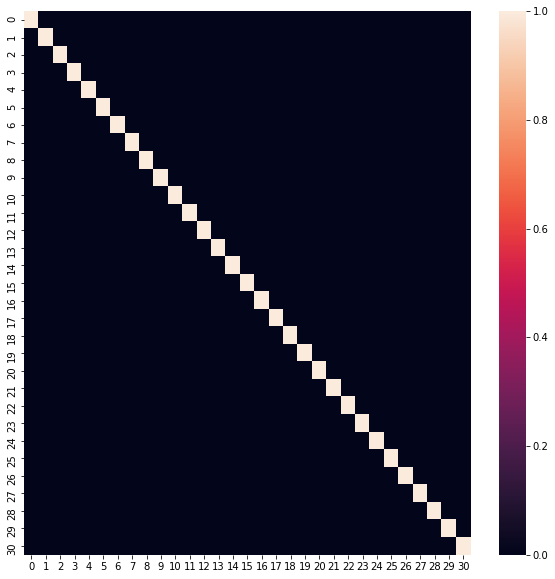

In [224]:
# The heatmap shows none of the components are correlated
plt.figure(figsize= (10,10))
sns.heatmap(pd.DataFrame(X_train_upca).corr())

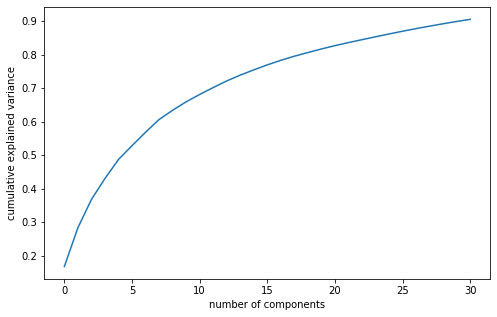

In [231]:
# Skreeplot showing explained variance
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


# Analysis

##  Churn indicators and strategies

#### 1. From the rfe and randomforest models it is evident that the average revenue per user for the 7th month as well as the total outgoing minutes of usage for the 7th and 8th month are very good indicators of churn.


#### 2. The offnet or call to all networks outside the network for the 8th month is a good churn indicator which could mean that in the 8th month the churn users get interested in other networks, offers could be provided to such users.

#### 3. Total recharge amount in the 8th month is another strong indicator of churn

## Model selection

#### PCA with a Logistic Regression model seems to be the most effective model with the highest recall score followed by RFE with gridsearch on a logistic regression model

#### RandomForest model can also be fitted after hyperparameter tuning although the recall is not as good as RFE with Logistic regression, it can be used to identify important components.

#### RFE can also be used along with Logistic Regression to identify important components

## Evaluation Metric

#### The most effective evaluation metric in this type of data set would be the recall score as false negatives can prove to be costly, f1 score can also be used to evaluate the model.